In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('played_out_removed_NA.csv', index_col=False)


In [2]:
print(data.shape)
data.head()

(4299, 22)


,position,user,first_genre,track_name,track_id,popularity,explicit,acousticness,danceability,energy,...,liveness,loudness,mode,speechiness,tempo,valence,artist,duration_ms,gender,age
0,0,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Subzero - Original Mix,7p6oXzBSPAXXz8Xb8gBPki,45,False,0.588000,0.793,0.608,...,0.0991,-11.638,0.0,0.0673,124.988,0.1180,Ben Klock,383972,M,40
1,1,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,85,True,0.003830,0.561,0.965,...,0.3710,-3.673,0.0,0.0343,128.040,0.3040,"David Guetta, Bebe Rexha",175238,M,40
2,2,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,I Don't Wanna Wait,331l3xABO0HMr1Kkyh2LZq,81,False,0.037500,0.681,0.714,...,0.2320,-4.617,0.0,0.0309,129.976,0.5540,"David Guetta, OneRepublic",149667,M,40
3,3,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Love Tonight (David Guetta Remix Edit),2prnn41CblB8B4yWACDljP,76,False,0.015000,0.621,0.989,...,0.1840,-4.225,0.0,0.0434,126.002,0.0348,"Shouse, David Guetta",158095,M,40
4,4,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,Wide Open - Len Faki DjEdit,477I4wif0etzeupmlQzTxl,40,False,0.000077,0.886,0.616,...,0.0987,-7.105,1.0,0.0835,128.015,0.0952,"DJ Hyperactive, Len Faki",435571,M,40


# Analysis

In [3]:
## Feature separation
# >>> Included popularity as one of the continuous features
continuous_features = ['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 
                       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'] # 10
categorical_features = ['key', 'mode'] # 2

audio_features = continuous_features + categorical_features # 12

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply standardization to continuous features
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [5]:
data.keys() # 22


Index(['position', 'user', 'first_genre', 'track_name', 'track_id',
       'popularity', 'explicit', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'artist', 'duration_ms', 'gender',
       'age'],
      dtype='object')

In [6]:
# 1) Make sure this cell runs AFTER any place where genre_mapping was a list
genre_mapping = {
    1: '(1) Pop & Mainstream',
    2: '(2) Urban & Contemporary',
    3: '(3) Electronic & Beat-Based',
    4: '(4) Rock & Heavy',
    5: '(5) Roots, Jazz & Classical Traditions'
}

# 2) If first_genre is float, cast to int
data = data.copy()
data['genre_label'] = data['first_genre'].map(genre_mapping)

print(type(genre_mapping))          # should be <class 'dict'>
print(data[['first_genre', 'genre_label']])


<class 'dict'>
      first_genre                  genre_label
0               3  (3) Electronic & Beat-Based
1               3  (3) Electronic & Beat-Based
2               3  (3) Electronic & Beat-Based
3               3  (3) Electronic & Beat-Based
4               3  (3) Electronic & Beat-Based
...           ...                          ...
4294            1         (1) Pop & Mainstream
4295            1         (1) Pop & Mainstream
4296            1         (1) Pop & Mainstream
4297            1         (1) Pop & Mainstream
4298            1         (1) Pop & Mainstream

[4299 rows x 2 columns]


# 1) each audio feature over 50 consequent posistions w.r.t. 5 genres

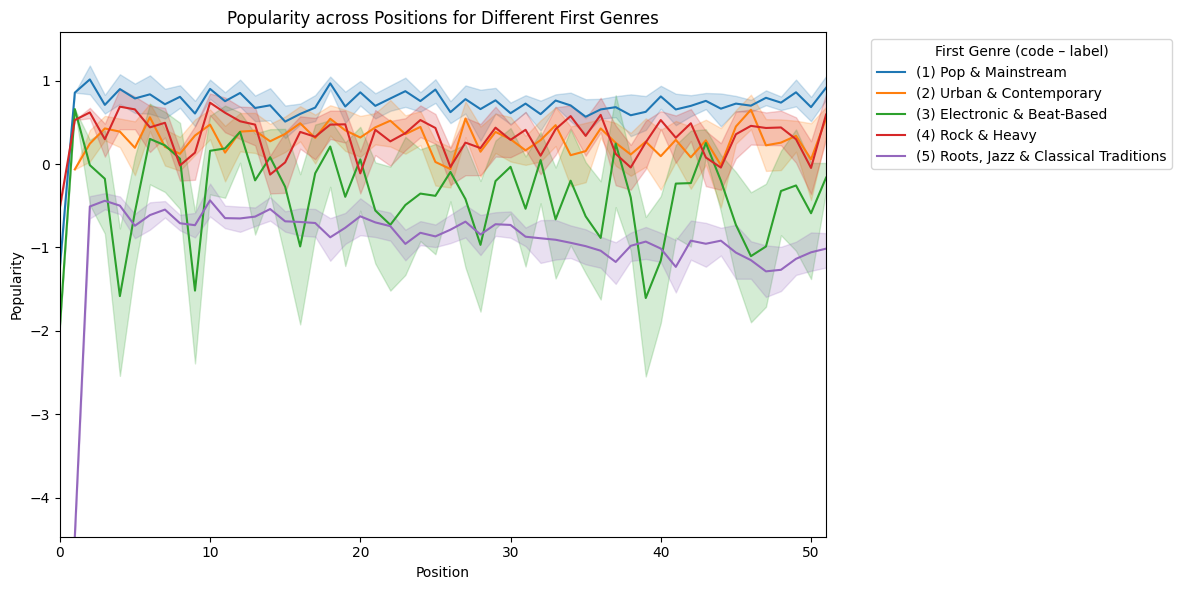

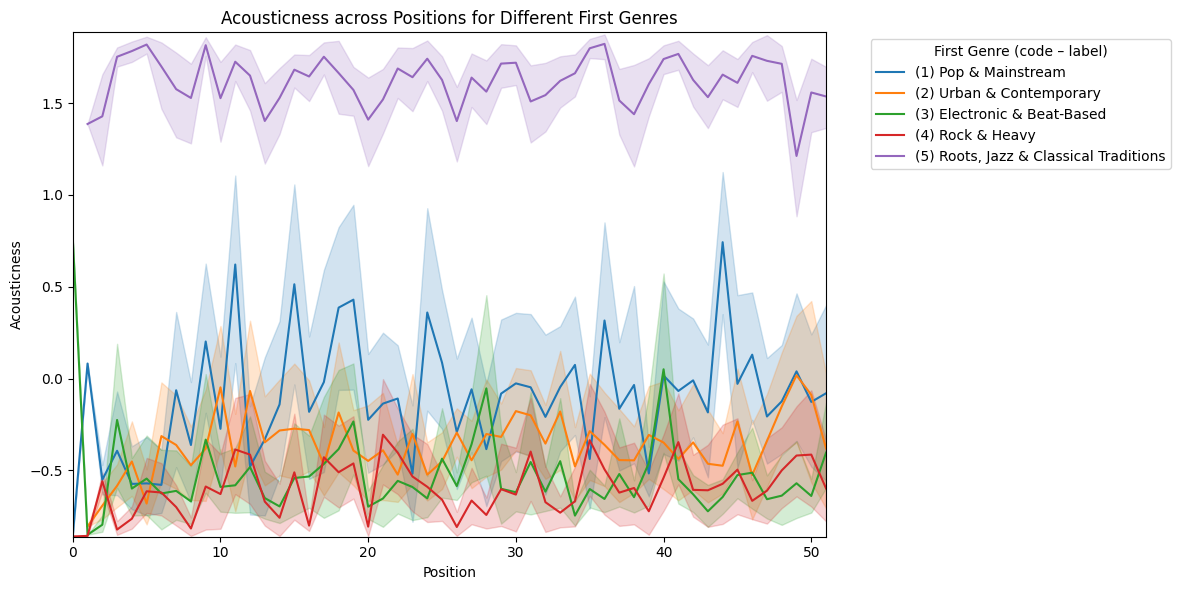

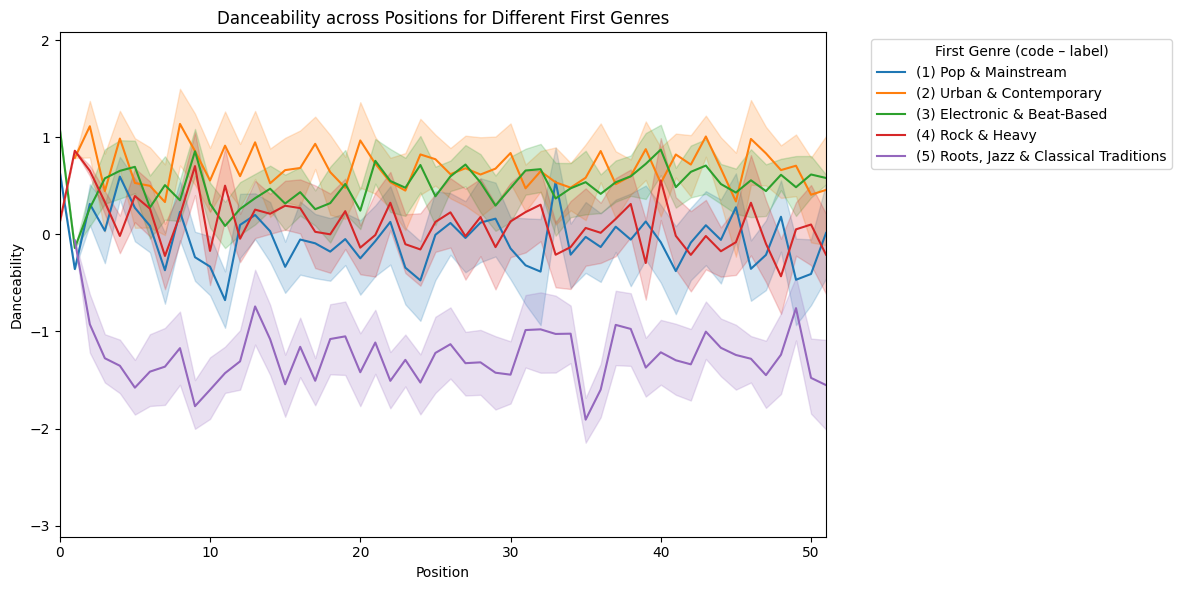

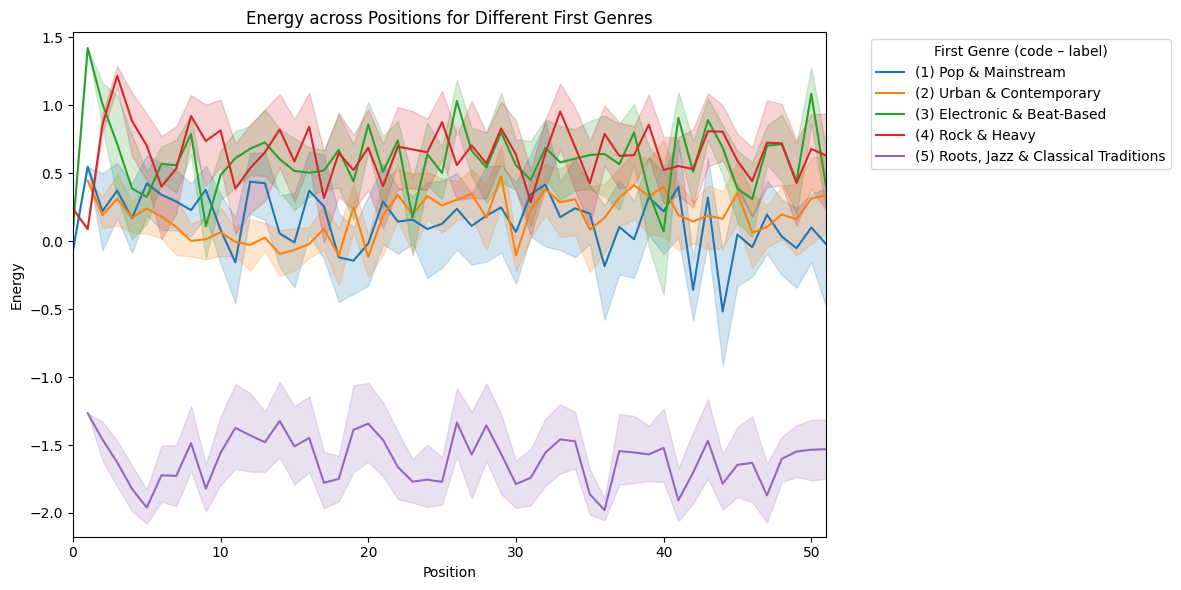

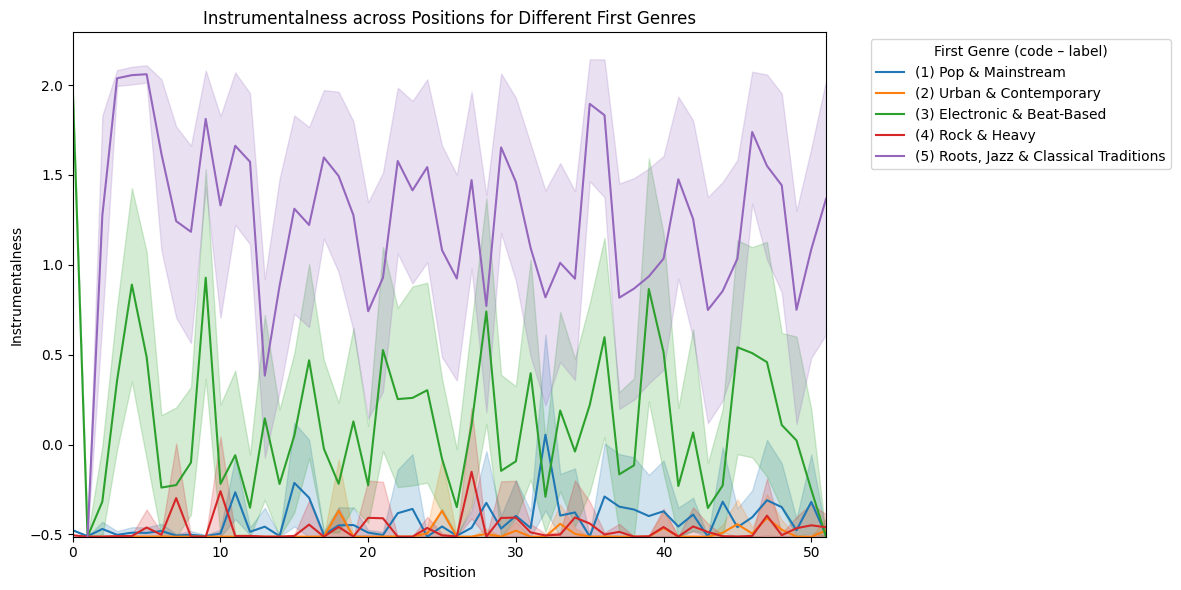

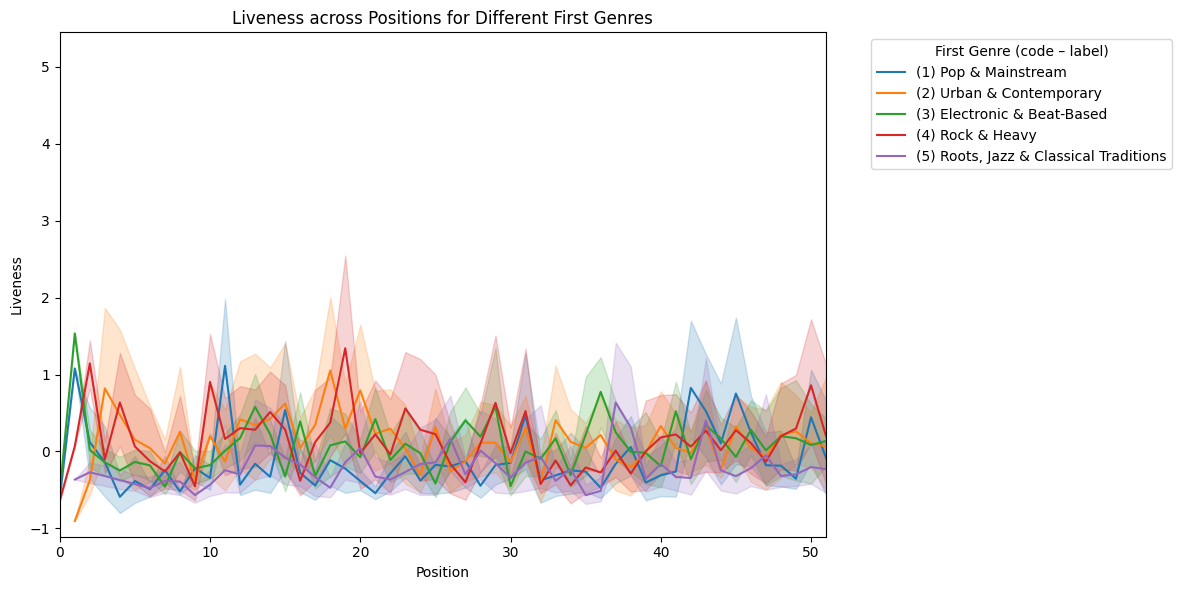

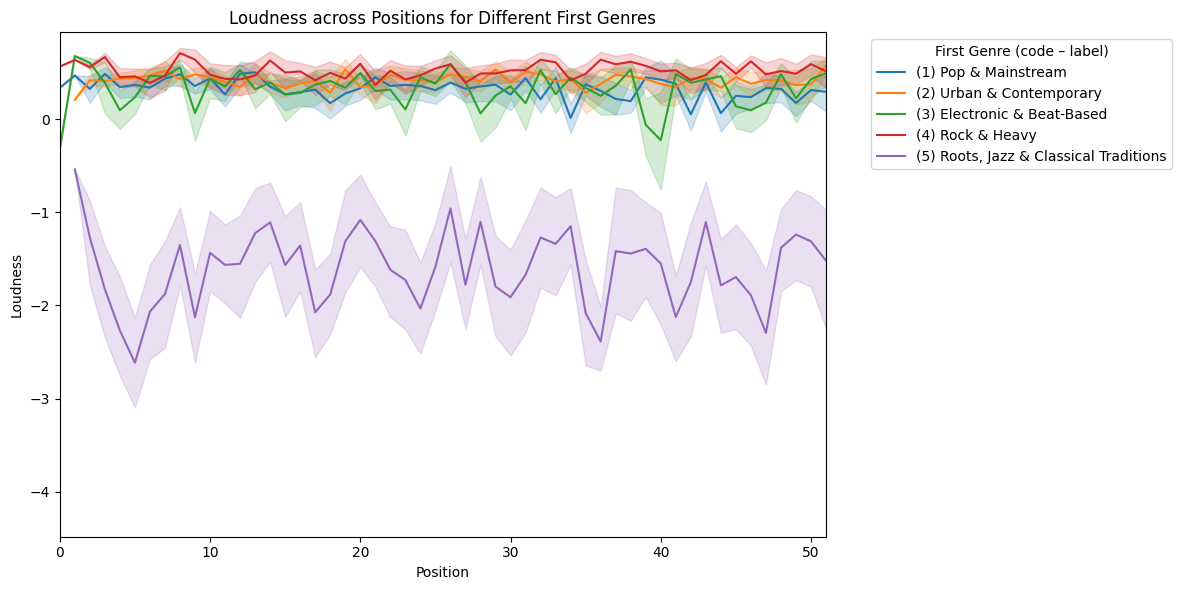

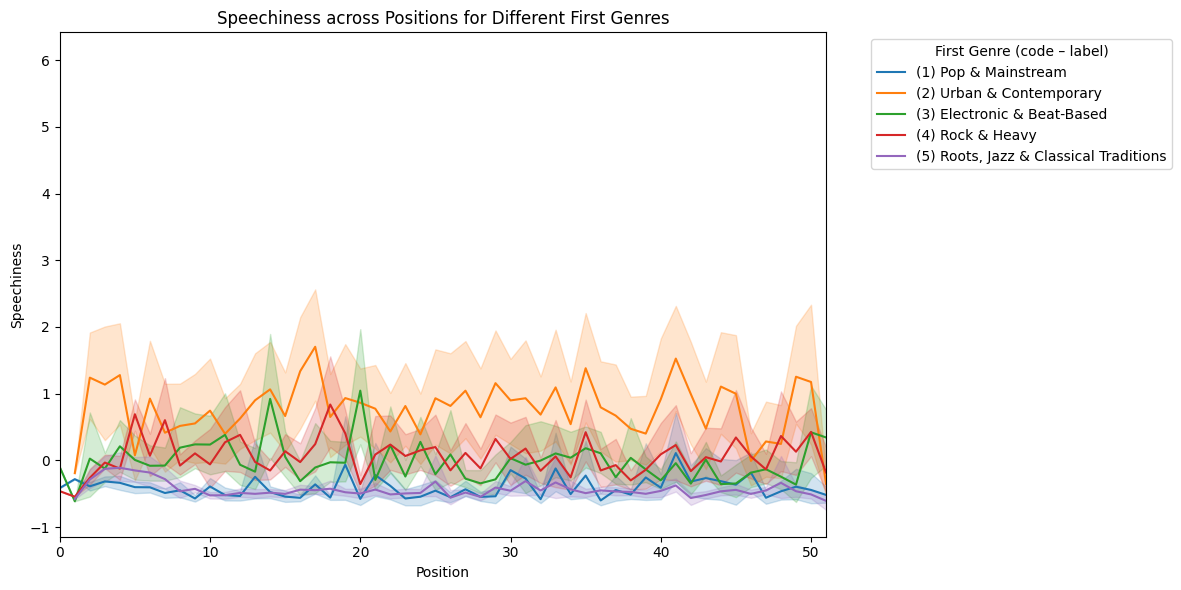

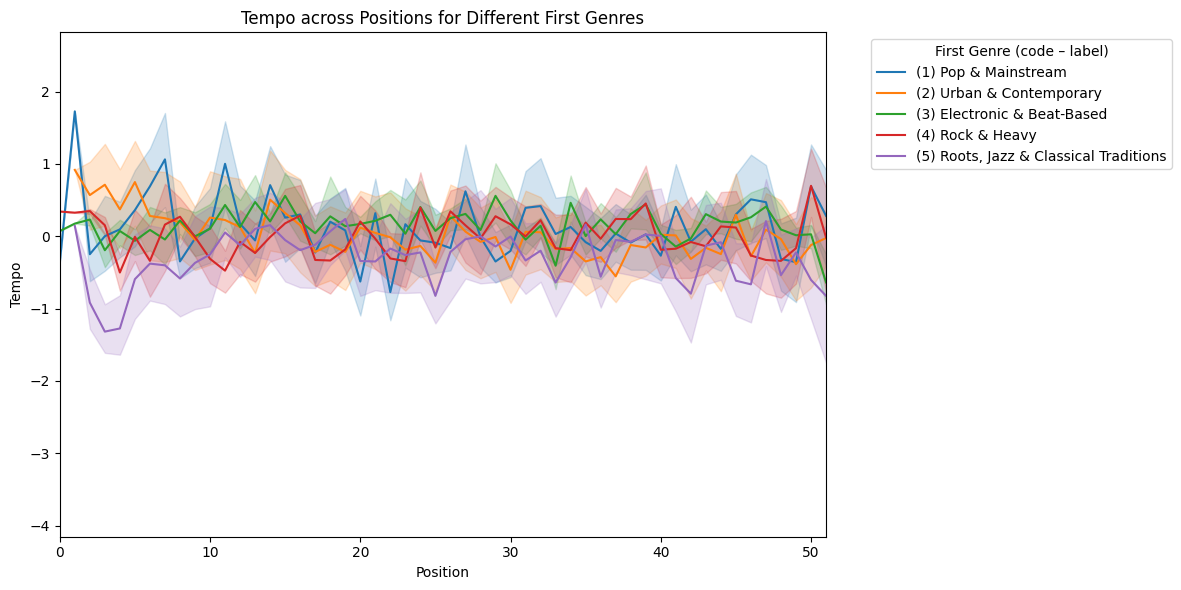

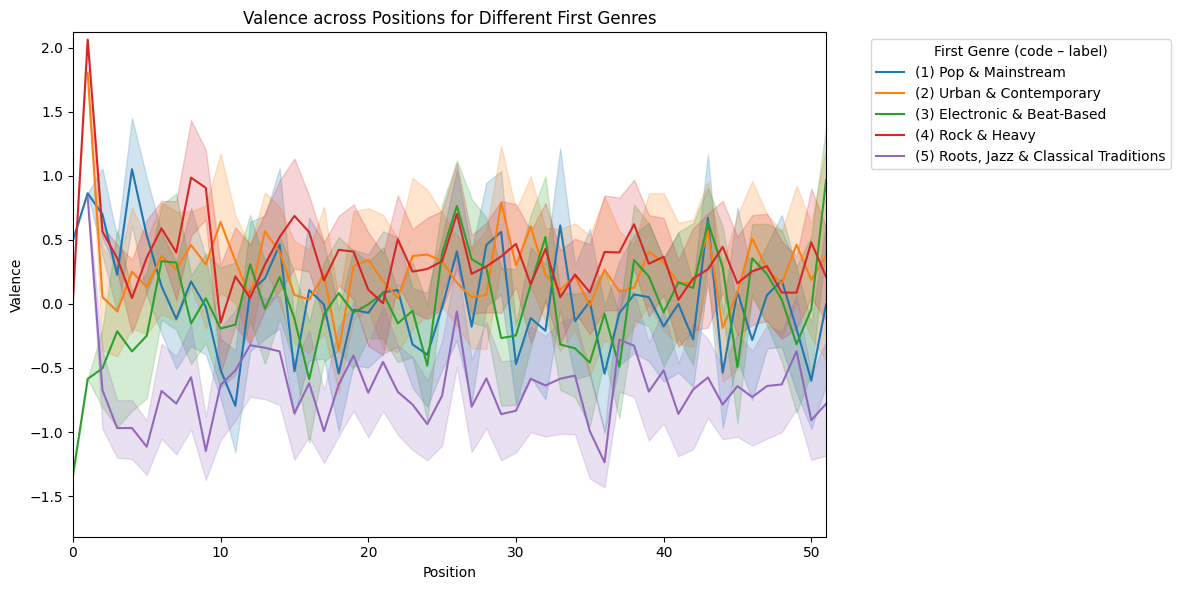

In [7]:
# Build ordered list of labels based on numeric code
ordered_labels = [genre_mapping[i] for i in sorted(genre_mapping.keys())]

for feature in continuous_features:
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(
        x='position',
        y=feature,
        hue='genre_label',
        data=data,
        palette='tab10',
        hue_order=ordered_labels      # <- forces legend order (1..5)
    )
    plt.xlim(0, 51)
    plt.ylim(data[feature].min(), data[feature].max())
    plt.title(f'{feature.capitalize()} across Positions for Different First Genres')
    plt.xlabel('Position')
    plt.ylabel(feature.capitalize())
    plt.legend(
        title='First Genre (code – label)',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )
    plt.tight_layout()
    plt.show()

## 2) Distance based, Audio features as a vector
Considering distance from the 2 seed songs to other 48 songs as an output and positions as an input


In [8]:

from scipy.spatial.distance import hamming

In [9]:
data[continuous_features + categorical_features]

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode
0,-1.971184,0.760508,1.090316,0.089171,1.973417,-0.532155,-0.321326,-0.102106,0.072394,-1.339579,6.0,0.0
1,0.659264,-0.850281,-0.139816,1.421157,-0.513158,1.534480,0.679642,-0.613612,0.175592,-0.585827,7.0,0.0
2,0.396219,-0.757440,0.496460,0.484663,-0.513179,0.477980,0.561009,-0.666313,0.241055,0.427280,1.0,0.0
3,0.067413,-0.819481,0.178322,1.510703,0.517849,0.113146,0.610272,-0.472561,0.106681,-1.676741,10.0,0.0
4,-2.299990,-0.860629,1.583430,0.119020,2.042730,-0.535195,0.248340,0.148998,0.174747,-1.431974,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4294,0.922309,1.154816,-0.161025,-0.530184,-0.513137,-0.449307,0.233385,-0.768615,0.792245,-0.954598,5.0,1.0
4295,0.856548,-0.723524,0.157113,0.189910,-0.513137,-0.038868,0.290566,-0.653913,-0.670449,-0.010383,11.0,0.0
4296,1.185354,0.826686,-0.638231,-1.257739,-0.512396,0.006736,-0.367070,-0.477211,0.853920,-1.307159,6.0,0.0
4297,0.725025,-0.146676,0.936550,0.451083,-0.512921,-0.373300,0.706033,-0.705064,-0.401600,1.347181,8.0,1.0


In [10]:


# function to compute per-user drift analysis
def user_drift_analysis(session):
    """Per-user: distances from genre-specific dual seeds"""
    session = session.sort_values('position').reset_index(drop=True)
    
    # In case if user playlist consists of less than 3 songs 
    if len(session) < 3:
        return pd.DataFrame()
    
    # In case if user playlist consists of more than 49 songs
    elif len(session) > 49:
        session = session.iloc[:49]
    
    # FIXED: User's seed genre (same for all 48 songs)
    user_seed_genre = int(session.iloc[0]['first_genre'])  # Genre 1-5 for this user
    
    # Dual seeds: pos 0+1 (guaranteed same genre)
    seeds = session[session['position'] <= 1]

    # For continuous features, use the mean across the seed rows
    seed_cont = np.mean(seeds[continuous_features].values, axis=0).reshape(1, -1)
    
    # For categorical features, use the mode (most common value) across the seed rows
    # and compute Hamming distance (proportion of differing categorical entries)
    seed_cat = seeds[categorical_features].mode().iloc[0].astype(int).values.reshape(1, -1)
    
    results = []
    # All 48 post-seed songs
    for _, song in session[session['position'] > 1].iterrows():
        song_cont = song[continuous_features].values.reshape(1, -1)
        song_cat  = song[categorical_features].astype(int).values.reshape(1, -1)
        
        # Calculating Euclidean distance for continuous features
        cont_drift = np.linalg.norm(seed_cont - song_cont)
        
        # Calculating Hamming distance for categorical features
        cat_drift = hamming(seed_cat.ravel(), song_cat.ravel()) # normalized distance
        
        # Total drift as sum of both
        total_drift = cont_drift + cat_drift
        
        results.append({
            'user': song['user'],
            'position': int(song['position']),  # 2-49
            'user_seed_genre': user_seed_genre,  # FIXED: User's genre (1-5)
            'cont_drift': float(cont_drift),
            'cat_drift': float(cat_drift),
            'total_drift': float(total_drift)
        })
    
    return pd.DataFrame(results)


In [11]:
# Generate: 89 users × 48 songs
user_drifts = [user_drift_analysis(group) for _, group in data.groupby('user')]

all_user_drifts = pd.concat([df for df in user_drifts if len(df) > 0], ignore_index=True)

all_user_drifts

,user,position,user_seed_genre,cont_drift,cat_drift,total_drift
0,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,2,3,2.328410,0.5,2.828410
1,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,3,3,1.639224,0.5,2.139224
2,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,4,3,2.877924,1.0,3.877924
3,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,5,3,2.851989,1.0,3.851989
4,0eeb2810a28f4aec9fb457dd2049c015_Benedict Bond,6,3,4.097489,0.5,4.597489
...,...,...,...,...,...,...
4112,f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c,45,1,2.770216,0.5,3.270216
4113,f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c,46,1,1.928205,0.5,2.428205
4114,f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c,47,1,3.297617,0.5,3.797617
4115,f9a2b3c8d4e1f7a0b5c6d9e2f1a3b8c,48,1,1.947938,1.0,2.947938


In [12]:
all_user_drifts.to_csv('89_user_48_song_drifts.csv', index=False)
print("\nColumns:", all_user_drifts.columns.tolist())
print("\nQuick stats by user_seed_genre:")
print(all_user_drifts.groupby('user_seed_genre')['total_drift'].agg(['mean', 'std', 'count']).round(3))



Columns: ['user', 'position', 'user_seed_genre', 'cont_drift', 'cat_drift', 'total_drift']

Quick stats by user_seed_genre:
                  mean    std  count
user_seed_genre                     
1                3.452  0.747    775
2                4.132  1.215    826
3                3.578  0.812    825
4                3.231  1.033    845
5                5.971  0.882    846


In [13]:
# How to access key and value separately in dictionary

genre_mapping

{1: '(1) Pop & Mainstream',
 2: '(2) Urban & Contemporary',
 3: '(3) Electronic & Beat-Based',
 4: '(4) Rock & Heavy',
 5: '(5) Roots, Jazz & Classical Traditions'}

Stats preview:
   position  user_seed_genre      mean       std  count
0         2                1  3.325962  0.191268     17
1         2                2  3.614987  1.166457     16
2         2                3  3.334617  0.939929     18
3         2                4  2.976860  0.207511     18
4         2                5  5.925531  0.954615     17
Genres: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Positions: 2 → 51


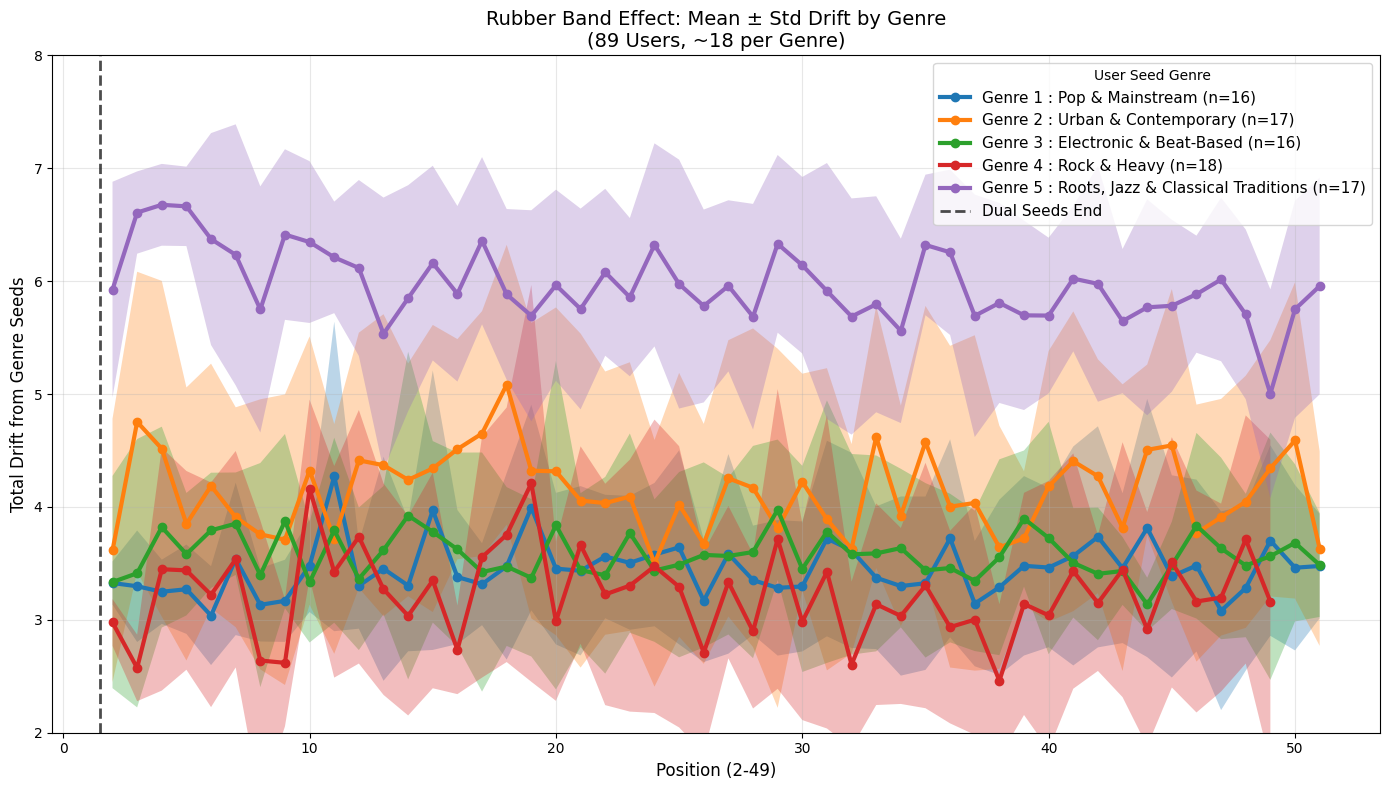

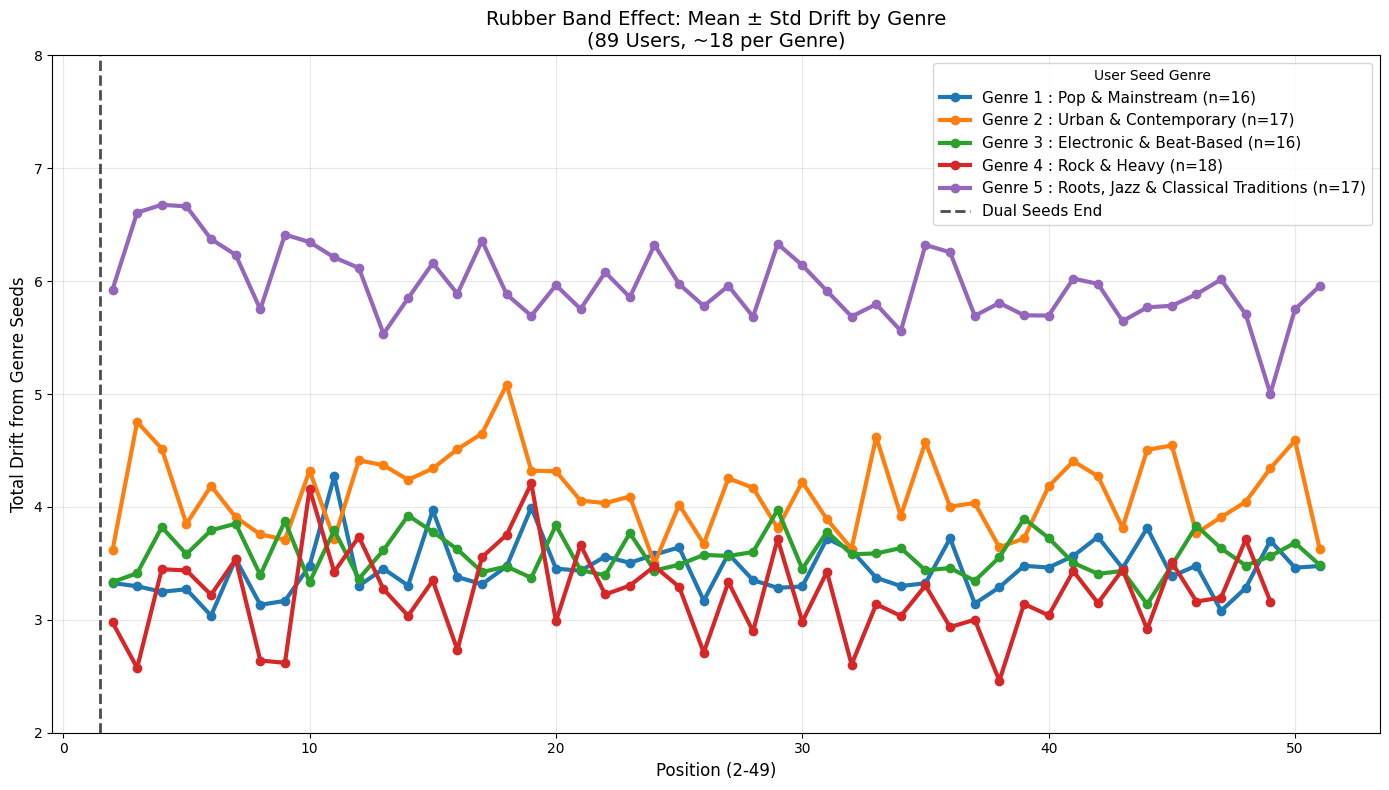

In [20]:

import seaborn as sns
import numpy as np

# Make sure this cell runs AFTER any place where genre_mapping is dictionary
genre_mapping = {
    1: 'Pop & Mainstream',
    2: 'Urban & Contemporary',
    3: 'Electronic & Beat-Based',
    4: 'Rock & Heavy',
    5: 'Roots, Jazz & Classical Traditions'
}
# Load your saved data
all_user_drifts = pd.read_csv('89_user_48_song_drifts.csv')

# Calculate mean + std by position and genre (~18 users per genre)
drift_stats = all_user_drifts.groupby(['position', 'user_seed_genre'])['total_drift'].agg(['mean', 'std', 'count']).reset_index()

print("Stats preview:")
print(drift_stats.head())
print(f"Genres: {sorted(all_user_drifts['user_seed_genre'].unique())}")
print(f"Positions: {all_user_drifts['position'].min()} → {all_user_drifts['position'].max()}")

# Plot 1: With Bands Mean ± 1 std, ~18 users per genre per position
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(
    genre_data['position'],
    genre_data['mean'],
    marker='o',
    linewidth=3,
    label=(
        f"Genre {int(genre)} : "
        f"{genre_mapping[int(genre)]} "
        f"(n={genre_data['count'].mean():.0f})"
    )
)

    # Shaded std region
    plt.fill_between(genre_data['position'],genre_data['mean'] - genre_data['std'],genre_data['mean'] + genre_data['std'], alpha=0.3)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.ylim(2, 8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Plot 2 : Witout Std Bands
plt.figure(figsize=(14, 8))
for genre in sorted(all_user_drifts['user_seed_genre'].unique()):
    genre_data = drift_stats[drift_stats['user_seed_genre'] == genre]
    
    plt.plot(
    genre_data['position'],
    genre_data['mean'],
    marker='o',
    linewidth=3,
    label=(
        f"Genre {int(genre)} : "
        f"{genre_mapping[int(genre)]} "
        f"(n={genre_data['count'].mean():.0f})"
    )
)

plt.axvline(x=1.5, color='k', ls='--', lw=2, alpha=0.7, label='Dual Seeds End')
plt.xlabel('Position (2-49)', fontsize=12)
plt.ylabel('Total Drift from Genre Seeds', fontsize=12)
plt.title('Rubber Band Effect: Mean ± Std Drift by Genre\n(89 Users, ~18 per Genre)', fontsize=14)
plt.legend(title='User Seed Genre', fontsize=11)
plt.ylim(2, 8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

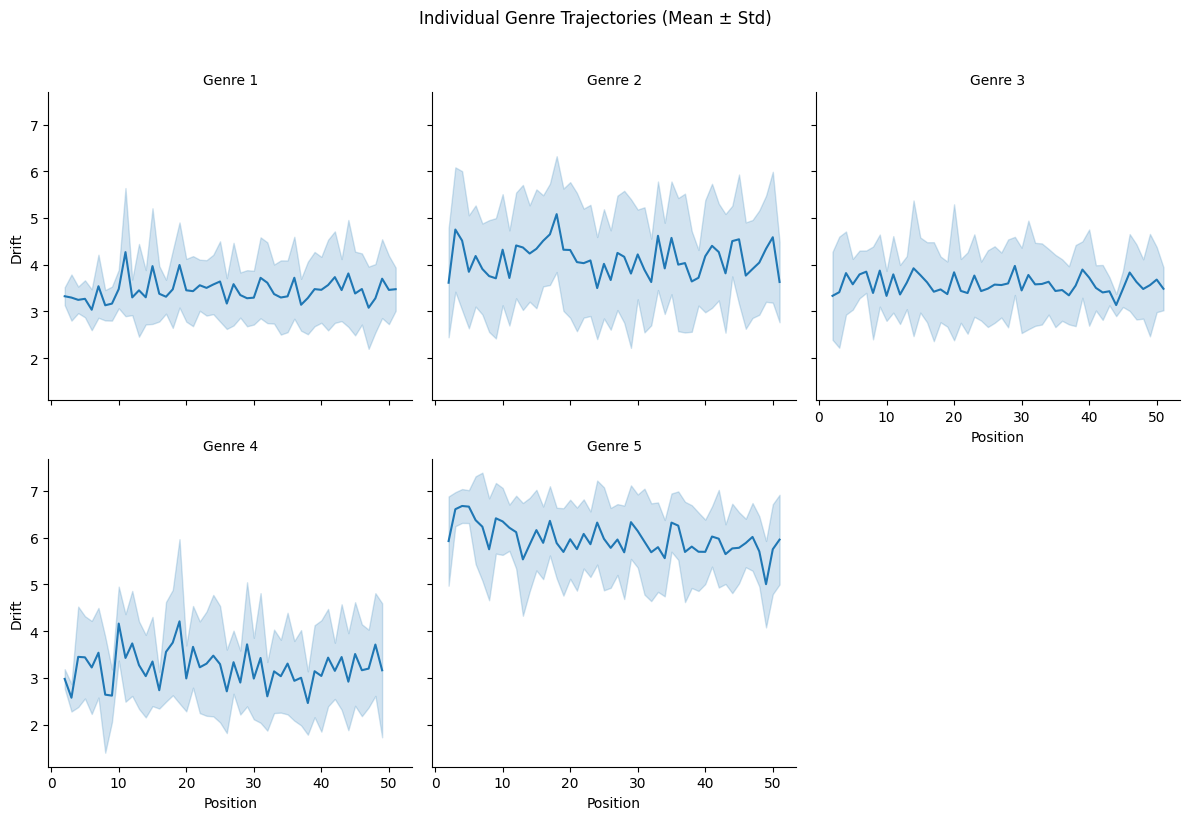

In [15]:
# Bonus: Separate panels per genre
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(all_user_drifts, col='user_seed_genre', col_wrap=3, height=4)
g.map(sns.lineplot, 'position', 'total_drift', errorbar='sd')
g.set_titles('Genre {col_name}')
g.set_xlabels('Position')
g.set_ylabels('Drift')
g.fig.suptitle('Individual Genre Trajectories (Mean ± Std)', y=1.02)
plt.tight_layout()
plt.show()
